In [3]:
import pandas as pd

from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [3]:
pd.__version__

'1.4.2'

In [4]:
!pip install pyarrow

     |████████████████████████████████| 42.1 MB 10.0 MB/s eta 0:00:01


In [5]:
df = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2024-01.parquet')

In [6]:
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2024-01-01 00:57:55   2024-01-01 01:17:43              1.0   
1         1  2024-01-01 00:03:00   2024-01-01 00:09:36              1.0   
2         1  2024-01-01 00:17:06   2024-01-01 00:35:01              1.0   
3         1  2024-01-01 00:36:38   2024-01-01 00:44:56              1.0   
4         1  2024-01-01 00:46:51   2024-01-01 00:52:57              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           1.72         1.0                  N           186            79   
1           1.80         1.0                  N           140           236   
2           4.70         1.0                  N           236            79   
3           1.40         1.0                  N            79           211   
4           0.80         1.0                  N           211           148   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0             2         17.7    1.0      0.5        0.00           0.0   
1             1         10.0    3.5      0.5        3.75           0.0   
2             1         23.3    3.5      0.5        3.00           0.0   
3             1         10.0    3.5      0.5        2.00           0.0   
4             1          7.9    3.5      0.5        3.20           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  Airport_fee  
0                    1.0         22.70                   2.5          0.0  
1                    1.0         18.75                   2.5          0.0  
2                    1.0         31.30                   2.5          0.0  
3                    1.0         17.00                   2.5          0.0  
4                    1.0         16.10                   2.5          0.0

In [7]:
import sklearn

In [8]:
sklearn.__version__

'1.0.2'

In [4]:
df_jan = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-01.parquet')
#df_jan_g = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2023-01.parquet')

In [5]:
df_jan.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:32:10   2023-01-01 00:40:36              1.0   
1         2  2023-01-01 00:55:08   2023-01-01 01:01:27              1.0   
2         2  2023-01-01 00:25:04   2023-01-01 00:37:49              1.0   
3         1  2023-01-01 00:03:48   2023-01-01 00:13:25              0.0   
4         2  2023-01-01 00:10:29   2023-01-01 00:21:19              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           0.97         1.0                  N           161           141   
1           1.10         1.0                  N            43           237   
2           2.51         1.0                  N            48           238   
3           1.90         1.0                  N           138             7   
4           1.43         1.0                  N           107            79   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0             2          9.3   1.00      0.5        0.00           0.0   
1             1          7.9   1.00      0.5        4.00           0.0   
2             1         14.9   1.00      0.5       15.00           0.0   
3             1         12.1   7.25      0.5        0.00           0.0   
4             1         11.4   1.00      0.5        3.28           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  
0                    1.0         14.30                   2.5         0.00  
1                    1.0         16.90                   2.5         0.00  
2                    1.0         34.90                   2.5         0.00  
3                    1.0         20.85                   0.0         1.25  
4                    1.0         19.68                   2.5         0.00

In [5]:
df_feb = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-02.parquet')

In [6]:
df_feb.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         1  2023-02-01 00:32:53   2023-02-01 00:34:34              2.0   
1         2  2023-02-01 00:35:16   2023-02-01 00:35:30              1.0   
2         2  2023-02-01 00:35:16   2023-02-01 00:35:30              1.0   
3         1  2023-02-01 00:29:33   2023-02-01 01:01:38              0.0   
4         2  2023-02-01 00:12:28   2023-02-01 00:25:46              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           0.30         1.0                  N           142           163   
1           0.00         1.0                  N            71            71   
2           0.00         1.0                  N            71            71   
3          18.80         1.0                  N           132            26   
4           3.22         1.0                  N           161           145   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0             2          4.4   3.50      0.5         0.0           0.0   
1             4         -3.0  -1.00     -0.5         0.0           0.0   
2             4          3.0   1.00      0.5         0.0           0.0   
3             1         70.9   2.25      0.5         0.0           0.0   
4             1         17.0   1.00      0.5         3.3           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  Airport_fee  
0                    1.0          9.40                   2.5         0.00  
1                   -1.0         -5.50                   0.0         0.00  
2                    1.0          5.50                   0.0         0.00  
3                    1.0         74.65                   0.0         1.25  
4                    1.0         25.30                   2.5         0.00

In [6]:
len(df_jan.columns)

19

In [8]:
len(df_feb.columns)

19

In [7]:
df_jan['duration'] = df_jan.tpep_dropoff_datetime - df_jan.tpep_pickup_datetime
df_jan['duration'] = df_jan.duration.dt.total_seconds() / 60

In [8]:
df_jan.duration.mean()

15.668995167332046

In [9]:
df_jan.duration.std()

42.594351241920904

In [10]:
len(df_jan[(df_jan.duration >= 1) & (df_jan.duration <= 60)]) / len(df_jan) * 100

98.1220282212598

In [11]:
df_jan = df_jan[(df_jan.duration >= 1) & (df_jan.duration <= 60)].copy()

In [12]:
categorical = ['PULocationID', 'DOLocationID']

In [13]:
df_jan[categorical] = df_jan[categorical].astype(str)
train_dicts = df_jan[categorical].to_dict(orient='records')
dv = DictVectorizer()
X_train = dv.fit_transform(train_dicts)
print(f'Feature matrix size: {X_train.shape}')

Feature matrix size: (3009173, 515)


In [14]:
target = 'duration'
y_train = df_jan[target].values
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_train)

print(f'Train RMSE: {mean_squared_error(y_train, y_pred, squared=False)}')

Train RMSE: 7.649261027826866


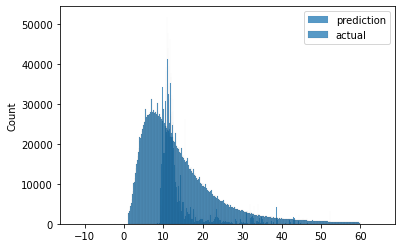

In [15]:
sns.histplot(y_pred, label='prediction')
sns.histplot(y_train, label='actual')

plt.legend();

In [16]:
categorical = ['PULocationID', 'DOLocationID']

def read_data(filename):
    df = pd.read_parquet(filename)

    df['duration'] = df.tpep_dropoff_datetime - df.tpep_pickup_datetime
    df.duration = df.duration.dt.total_seconds() / 60

    df = df[(df.duration >= 1) & (df.duration <= 60)].copy()

    df[categorical] = df[categorical].astype('str')
    
    return df

In [17]:
df_val = read_data('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-02.parquet')

In [18]:
val_dicts = df_val[categorical].to_dict(orient='records')

In [19]:
X_val = dv.transform(val_dicts) 
y_val = df_val.duration.values

In [20]:
y_pred = lr.predict(X_val)

In [21]:
print(f'Val RMSE: {mean_squared_error(y_val, y_pred, squared=False)}')

Val RMSE: 7.811832641626525
